In [1]:
!pip install pyreadstat
!pip install pandas


In [2]:
import pandas as pd 
import pyreadstat

In [3]:
# Specify the path to your .sav file
input_file = "HINTS6_SPSS_20240507/hints6_public.sav"

# Read the .sav file
df, meta = pyreadstat.read_sav(input_file)

# Save the DataFrame to a CSV file
output_file = "dataset.csv"
df.to_csv(output_file, index=False)

print(f"File saved as {output_file}")

File saved as dataset.csv


In [4]:
data = pd.read_csv(output_file)

/var/folders/p3/7nc5r6w54c54g6m_9rggzdk80000gn/T/ipykernel_15718/154153668.py:1: DtypeWarning: Columns (138,152,205,303) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


In [5]:
data.shape

(6252, 477)

In [6]:
data.head(10)

,HHID,APP_REGION,DRA,Treatment_H6,RUC2003,RUC2013,PR_RUCA_2010,NCHSURCODE2013,CENSDIV,CENSREG,...,smokeStat,PHQ4,WeeklyMinutesModerateExercise,eCigUse,AvgDrinksPerWeek,PCCScale,ISEE_Scale,PROMIS_Isolation_t,PROMIS_Meaning_t,IncomeRanges_IMP
0,21000006.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,5.0,3.0,...,2.0,0.0,0.0,3.0,0.0,100.0,-1.0,34.8,65.5,1.0
1,21000009.0,NaN,2.0,1.0,2.0,2.0,1.0,3.0,3.0,2.0,...,3.0,8.0,420.0,3.0,35.0,100.0,-1.0,53.9,41.7,6.0
2,21000020.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,-7.0,-7.0,-7.0,-7.0,-7.0,100.0,50.0,-7.0,-7.0,1.0
3,21000022.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,3.0,0.0,0.0,3.0,0.0,90.5,-1.0,34.8,56.5,5.0
4,21000039.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,5.0,3.0,...,3.0,6.0,10.0,3.0,0.0,57.1,-1.0,34.8,53.5,6.0
5,21000043.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,3.0,8.0,40.0,3.0,4.0,81.0,-1.0,60.1,35.2,9.0
6,21000044.0,NaN,2.0,1.0,5.0,5.0,4.0,5.0,9.0,4.0,...,2.0,0.0,180.0,3.0,2.0,61.9,-1.0,49.8,50.8,5.0
7,21000045.0,NaN,2.0,1.0,4.0,4.0,4.0,5.0,1.0,1.0,...,3.0,0.0,120.0,3.0,0.0,95.2,100.0,34.8,65.5,8.0
8,21000047.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,3.0,0.0,0.0,3.0,1.0,-1.0,-1.0,34.8,56.5,6.0
9,21000057.0,NaN,2.0,1.0,2.0,2.0,1.0,3.0,2.0,1.0,...,3.0,0.0,90.0,3.0,3.0,100.0,33.3,47.8,65.5,8.0


In [7]:
#Selecting Columns which are required for the analysis
necessary_cols= [
    'DocTellColorectalTests', 
    'WeeklyMinutesModerateExercise', 
    'IncreaseCancer_NEFruitVeg', 
    'IncreaseCancer_TMProcMeat', 
    'IncreaseCancer_TMFastFood', 
    'smokeStat', 
    'UseECigNow'
]

data_subset = data[necessary_cols]

In [8]:
data_subset.head()

,DocTellColorectalTests,WeeklyMinutesModerateExercise,IncreaseCancer_NEFruitVeg,IncreaseCancer_TMProcMeat,IncreaseCancer_TMFastFood,smokeStat,UseECigNow
0,-9.0,0.0,1.0,2.0,1.0,2.0,-1.0
1,1.0,420.0,1.0,1.0,1.0,3.0,-1.0
2,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
3,1.0,0.0,4.0,4.0,4.0,3.0,-1.0
4,3.0,10.0,1.0,1.0,1.0,3.0,-1.0


In [9]:
# Check for missing values
missing_summary = data_subset.isnull().sum()
print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
DocTellColorectalTests           0
WeeklyMinutesModerateExercise    0
IncreaseCancer_NEFruitVeg        0
IncreaseCancer_TMProcMeat        0
IncreaseCancer_TMFastFood        0
smokeStat                        0
UseECigNow                       0
dtype: int64


In [10]:
# Check data types of each column
print(data_subset.dtypes)

# Convert data types if necessary (e.g., categorical variables)
data_subset['DocTellColorectalTests'] = data_subset['DocTellColorectalTests'].astype('category')

DocTellColorectalTests           float64
WeeklyMinutesModerateExercise    float64
IncreaseCancer_NEFruitVeg        float64
IncreaseCancer_TMProcMeat        float64
IncreaseCancer_TMFastFood        float64
smokeStat                        float64
UseECigNow                       float64
dtype: object


/var/folders/p3/7nc5r6w54c54g6m_9rggzdk80000gn/T/ipykernel_15718/530587412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['DocTellColorectalTests'] = data_subset['DocTellColorectalTests'].astype('category')


In [11]:
data_cleaned = data_subset.dropna()


In [12]:
# Re-check for missing values
print(data_cleaned.isnull().sum())

# Preview cleaned data
print(data_cleaned.head())

DocTellColorectalTests           0
WeeklyMinutesModerateExercise    0
IncreaseCancer_NEFruitVeg        0
IncreaseCancer_TMProcMeat        0
IncreaseCancer_TMFastFood        0
smokeStat                        0
UseECigNow                       0
dtype: int64
  DocTellColorectalTests  WeeklyMinutesModerateExercise  \
0                   -9.0                            0.0   
1                    1.0                          420.0   
2                   -7.0                           -7.0   
3                    1.0                            0.0   
4                    3.0                           10.0   

   IncreaseCancer_NEFruitVeg  IncreaseCancer_TMProcMeat  \
0                        1.0                        2.0   
1                        1.0                        1.0   
2                       -7.0                       -7.0   
3                        4.0                        4.0   
4                        1.0                        1.0   

   IncreaseCancer_TMFastFood  sm

**Exploratory Data Analysis**

In [13]:
# Summary statistics for numerical variables
print(data_cleaned.describe())

# Frequency distribution for categorical variables
categorical_vars = ['DocTellColorectalTests', 'smokeStat', 'UseECigNow']
for var in categorical_vars:
    print(f"Frequency distribution for {var}:")
    print(data_cleaned[var].value_counts())

       WeeklyMinutesModerateExercise  IncreaseCancer_NEFruitVeg  \
count                    6252.000000                6252.000000   
mean                      154.672905                   1.483365   
std                       303.424793                   2.641221   
min                        -9.000000                  -9.000000   
25%                         0.000000                   1.000000   
50%                        80.000000                   2.000000   
75%                       180.000000                   3.000000   
max                      5250.000000                   4.000000   

       IncreaseCancer_TMProcMeat  IncreaseCancer_TMFastFood    smokeStat  \
count                6252.000000                6252.000000  6252.000000   
mean                    1.522873                   1.411708     1.931382   
std                     2.624221                   2.657915     2.405520   
min                    -9.000000                  -9.000000    -9.000000   
25%             

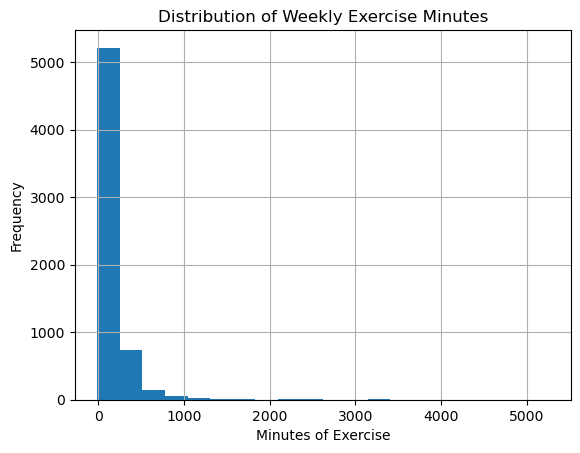

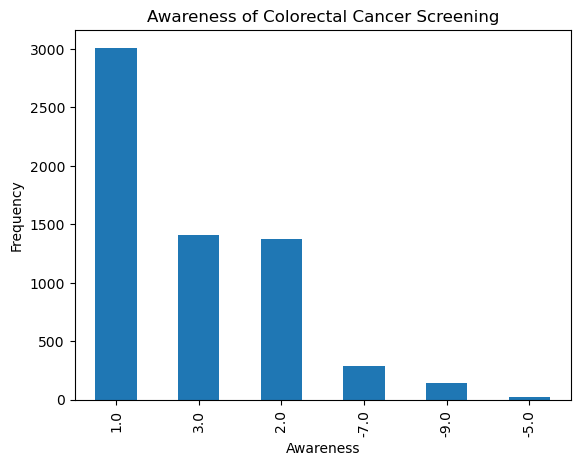

In [14]:
import matplotlib.pyplot as plt

# Histogram for exercise minutes
data_cleaned['WeeklyMinutesModerateExercise'].hist(bins=20)
plt.title('Distribution of Weekly Exercise Minutes')
plt.xlabel('Minutes of Exercise')
plt.ylabel('Frequency')
plt.show()

# Bar chart for awareness of colorectal screening
data_cleaned['DocTellColorectalTests'].value_counts().plot(kind='bar')
plt.title('Awareness of Colorectal Cancer Screening')
plt.xlabel('Awareness')
plt.ylabel('Frequency')
plt.show()

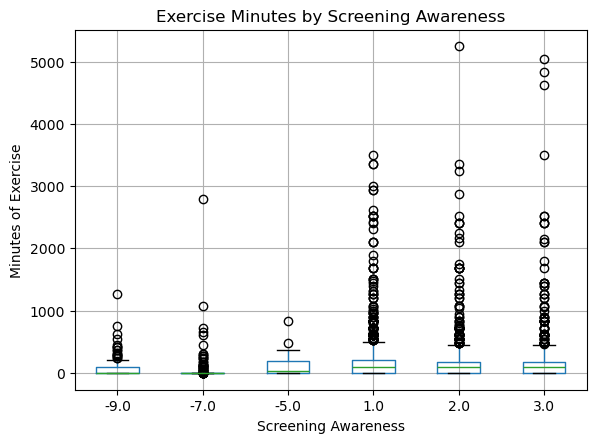

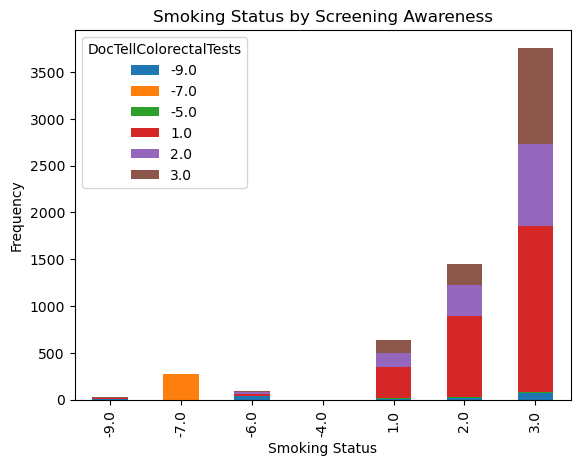

In [15]:
# Boxplot for exercise minutes by awareness
data_cleaned.boxplot(column='WeeklyMinutesModerateExercise', by='DocTellColorectalTests')
plt.title('Exercise Minutes by Screening Awareness')
plt.suptitle('')  # Remove automatic subtitle
plt.xlabel('Screening Awareness')
plt.ylabel('Minutes of Exercise')
plt.show()

# Stacked bar chart for smoking status
pd.crosstab(data_cleaned['smokeStat'], data_cleaned['DocTellColorectalTests']).plot(kind='bar', stacked=True)
plt.title('Smoking Status by Screening Awareness')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Correlation matrix for numerical variables
numerical_vars = ['WeeklyMinutesModerateExercise', 'IncreaseCancer_NEFruitVeg', 
                  'IncreaseCancer_TMProcMeat', 'IncreaseCancer_TMFastFood']
correlation_matrix = data_cleaned[numerical_vars].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                               WeeklyMinutesModerateExercise  \
WeeklyMinutesModerateExercise                       1.000000   
IncreaseCancer_NEFruitVeg                           0.077350   
IncreaseCancer_TMProcMeat                           0.075345   
IncreaseCancer_TMFastFood                           0.073376   

                               IncreaseCancer_NEFruitVeg  \
WeeklyMinutesModerateExercise                   0.077350   
IncreaseCancer_NEFruitVeg                       1.000000   
IncreaseCancer_TMProcMeat                       0.907061   
IncreaseCancer_TMFastFood                       0.903765   

                               IncreaseCancer_TMProcMeat  \
WeeklyMinutesModerateExercise                   0.075345   
IncreaseCancer_NEFruitVeg                       0.907061   
IncreaseCancer_TMProcMeat                       1.000000   
IncreaseCancer_TMFastFood                       0.925406   

                               IncreaseCancer_TMFastFood 

For each lifestyle factor, define null and alternative hypotheses.
1. Exercise (Numerical Variable):
Null Hypothesis (H0H_0H0​): Awareness of colorectal cancer screening (‘DocTellColorectalTests‘`DocTellColorectalTests`‘DocTellColorectalTests‘) has no impact on weekly exercise minutes.
Alternative Hypothesis (HaH_aHa​): Awareness of colorectal cancer screening (‘DocTellColorectalTests‘`DocTellColorectalTests`‘DocTellColorectalTests‘) significantly impacts weekly exercise minutes.
2. Smoking Status (Categorical Variable):
Null Hypothesis (H0H_0H0​): Awareness of colorectal cancer screening (‘DocTellColorectalTests‘`DocTellColorectalTests`‘DocTellColorectalTests‘) has no relationship with smoking status (‘smokeStat‘`smokeStat`‘smokeStat‘).
Alternative Hypothesis (HaH_aHa​): Awareness of colorectal cancer screening (‘DocTellColorectalTests‘`DocTellColorectalTests`‘DocTellColorectalTests‘) is associated with smoking status (‘smokeStat‘`smokeStat`‘smokeStat‘).


In [17]:
from scipy.stats import ttest_ind

# Group data by awareness
group_aware = data_cleaned[data_cleaned['DocTellColorectalTests'] == 1]['WeeklyMinutesModerateExercise']
group_not_aware = data_cleaned[data_cleaned['DocTellColorectalTests'] == 0]['WeeklyMinutesModerateExercise']

# Perform independent t-test
t_stat, p_value = ttest_ind(group_aware, group_not_aware, nan_policy='omit')

print("T-Test Results:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Test Results:
T-Statistic: nan, P-Value: nan


In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data_cleaned['DocTellColorectalTests'], data_cleaned['smokeStat'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}, P-Value: {p}")

Chi-Square Test Results:
Chi-Square Statistic: 6830.649276015304, P-Value: 0.0


In [19]:
from scipy.stats import spearmanr

# Spearman correlation for awareness and dietary perception
corr, p_value = spearmanr(data_cleaned['DocTellColorectalTests'], data_cleaned['IncreaseCancer_NEFruitVeg'])

print("Spearman Correlation Results:")
print(f"Correlation Coefficient: {corr}, P-Value: {p_value}")

Spearman Correlation Results:
Correlation Coefficient: 0.221870552230717, P-Value: 1.4038829551823032e-70


/Users/preetpatel/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


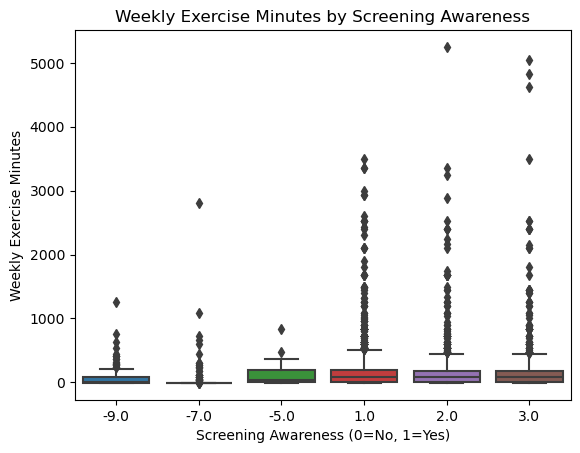

In [20]:
import seaborn as sns

# Boxplot for exercise minutes by awareness
sns.boxplot(x='DocTellColorectalTests', y='WeeklyMinutesModerateExercise', data=data_cleaned)
plt.title('Weekly Exercise Minutes by Screening Awareness')
plt.xlabel('Screening Awareness (0=No, 1=Yes)')
plt.ylabel('Weekly Exercise Minutes')
plt.show()

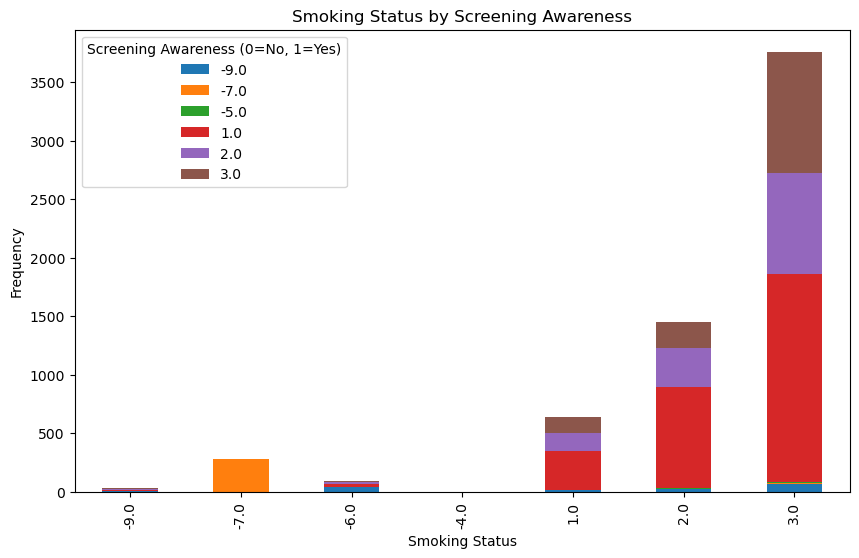

In [21]:
# Create a cross-tabulation
contingency_table = pd.crosstab(data_cleaned['smokeStat'], data_cleaned['DocTellColorectalTests'])

# Stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Smoking Status by Screening Awareness')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.legend(title='Screening Awareness (0=No, 1=Yes)')
plt.show()

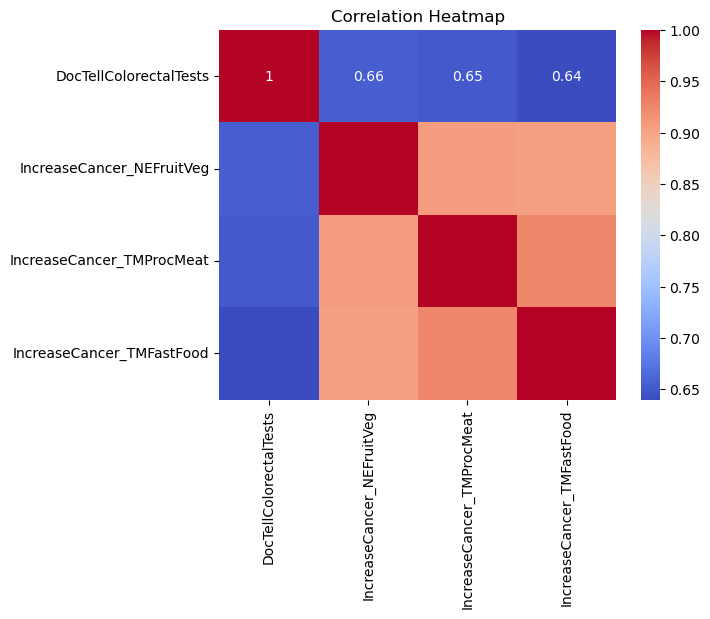

In [22]:
# Select variables for correlation matrix
correlation_vars = ['DocTellColorectalTests', 'IncreaseCancer_NEFruitVeg', 'IncreaseCancer_TMProcMeat', 'IncreaseCancer_TMFastFood']
correlation_matrix = data_cleaned[correlation_vars].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()